## Quantum Phase Estimation

In [30]:
import qiskit
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
import math

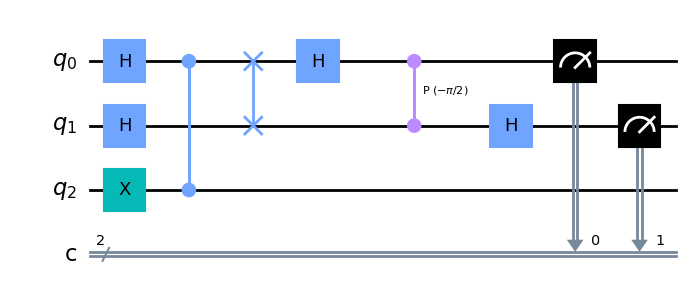

In [31]:
# Implementing QPE for Z-gate
def inverse_qft(circuit, n):
    """Apply inverse QFT."""
    # Swap the qubits
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    # Apply H and controlled rotations
    for target_qubit in range(n):
        for control_qubit in range(target_qubit):
            angle = -math.pi/2**(target_qubit - control_qubit)
            circuit.cp(angle, control_qubit, target_qubit)
        circuit.h(target_qubit)

# Create the QPE circuit
qc = QuantumCircuit(3, 2)  # 3 qubits, 2 classical bits for measurement

# Prepare the eigenvector |e1⟩ on the third qubit, which is basically |1>
qc.x(2)

# Apply Hadamard to the c-register (first 2 qubits)
qc.h([0, 1])

# Controlled-U operations, where U is Z in this case. Due to Z^2 = I, we only apply Z once.
qc.cz(0, 2)  # The controlled-Z for the least significant bit of the c-register

# Note: No need for another CZ for the next qubit in c-register since Z^2 = I

# Apply inverse QFT on first two qubits of the QC
inverse_qft(qc, 2)

# Measurement, measures first two qubits and stores result in the first two classical bits
qc.measure([0, 1], [0, 1])

# Display the circuit
qc.draw('mpl')


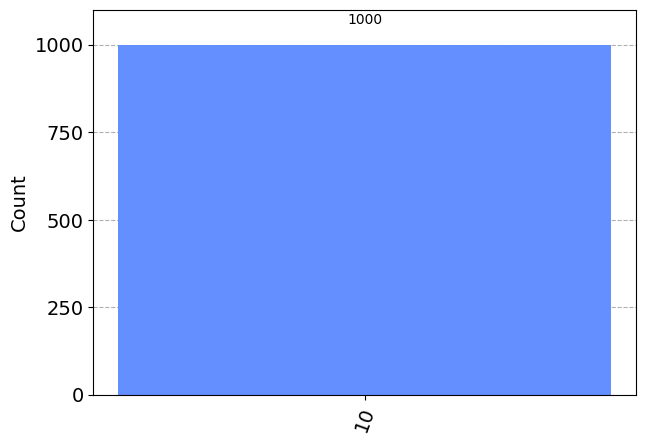

In [32]:
# Setup the simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation
result = simulator.run(compiled_circuit, shots=1000).result()

# Get the measurement results
counts = result.get_counts()

# Plot the results
plot_histogram(counts)

In [33]:
def inverse_qft(n):
    """Returns the inverse QFT as a gate."""
    iqft_circ = QuantumCircuit(n)
    
    # Swap the qubits
    for qubit in range(n//2):
        iqft_circ.swap(qubit, n-qubit-1)
    # Apply H and controlled rotations
    for target_qubit in range(n):
        for control_qubit in range(target_qubit):
            angle = -math.pi/2**(target_qubit - control_qubit)
            iqft_circ.cp(angle, control_qubit, target_qubit)
        iqft_circ.h(target_qubit)
        
    # Convert the IQFT circuit to a gate
    iqft_gate = iqft_circ.to_gate()
    iqft_gate.name = "IQFT"
    
    return iqft_gate


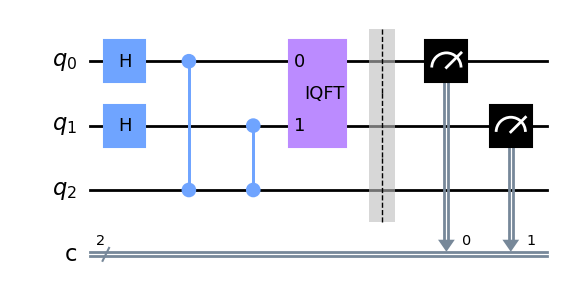

In [47]:
# Create the QPE circuit
qc = QuantumCircuit(3, 2)  # 3 qubits, 2 classical bits for measurement

# Prepare the eigenvector |e1⟩ on the third qubit
# qc.x(2)

# Apply Hadamard to the c-register (first 2 qubits)
qc.h([0, 1])

# Controlled-U operations, where U is Z in this case.
qc.cz(0, 2)  # The controlled-Z for the least significant bit of the c-register
qc.cz(1, 2)  # The controlled-Z for the next qubit in c-register

# Append the IQFT gate to our main circuit
qc.append(inverse_qft(2), [0, 1])
qc.barrier()
# Measurement
qc.measure([0, 1], [0, 1])

# Display the circuit
qc.draw('mpl')


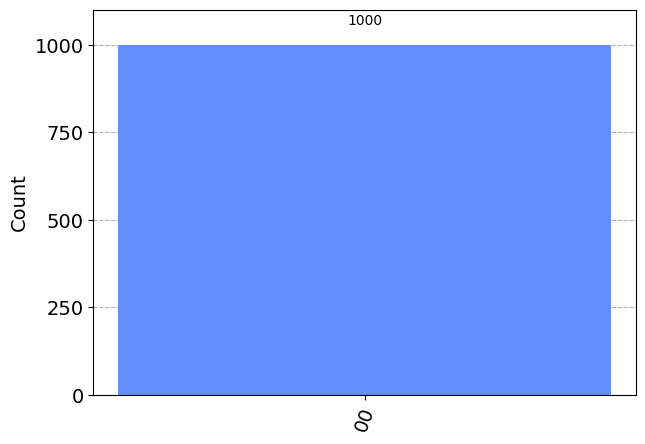

In [48]:
    # Setup the simulator
    simulator = AerSimulator()

    # Transpile the circuit for the simulator
    compiled_circuit = transpile(qc, simulator)

    # Run the simulation
    result = simulator.run(compiled_circuit, shots=1000).result()

    # Get the measurement results
    counts = result.get_counts()

    # Plot the results
    plot_histogram(counts)